## 1) Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import rcParams
%matplotlib inline
from scipy import stats
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
def parser(x):
    return datetime.strptime(x,'%d-%m-%y').date()

## 2) Load the reviewers support dataset

In [3]:
data_reviewers_support=pd.read_excel("C:\\Users\Ishan.Borkar\Downloads\TPRI_agent_Effort_2021\Msi Reviewers support ch.xlsx",header=0,date_parser='Date')
data_reviewers_support.head()

,Date,Link to incident,link to slack,Rating,Reviewers
0,2020-12-31,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Yuvaraja
1,2020-12-31,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Shiva Kumar
2,2021-01-01,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Shiva Kumar
3,2021-01-01,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Shiva Kumar
4,2021-01-01,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Rajeshwari


In [4]:
data_reviewers_support.shape

(175, 5)

In [5]:
data_reviewers_support.size

875

In [6]:
data_reviewers_support.isna().sum().to_frame().T

,Date,Link to incident,link to slack,Rating,Reviewers
0,0,20,0,0,2


## Analysis of the ratings and reviewers on 31st December 2021

In [7]:
data_reviewers_support_December=data_reviewers_support[(data_reviewers_support['Date'] == '2020-12-31')]
data_reviewers_support_December

,Date,Link to incident,link to slack,Rating,Reviewers
0,2020-12-31,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Yuvaraja
1,2020-12-31,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Shiva Kumar


#### Calculate the false alarms on 31st December 2021

In [8]:
data_reviewers_support_December['Rating'].unique()

array(['Wrong rating - Accident', 'Wrong rating - No accident'],
      dtype=object)

In [9]:
data_reviewers_support_December['Rating'].value_counts()

Wrong rating - Accident       1
Wrong rating - No accident    1
Name: Rating, dtype: int64

In [10]:
data_reviewers_support_December['Rating'].count()

2

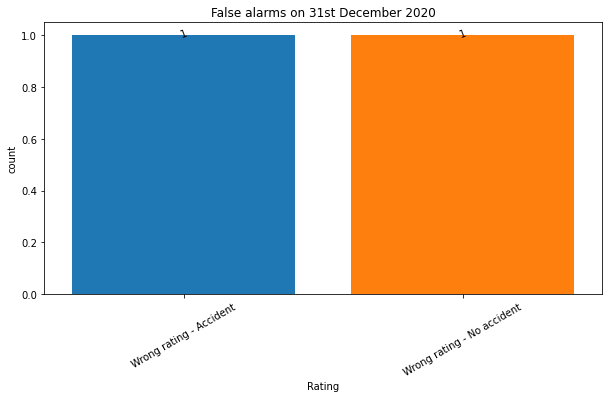

In [11]:
plt.figure(figsize=(10,5))
splot=sns.countplot(data_reviewers_support_December['Rating'],order=data_reviewers_support_December['Rating'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("False alarms on 31st December 2020", color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

#### Checking for the reviewers involved in the false alarms on 31st December 2020

In [12]:
data_reviewers_support_December['Reviewers'].unique()

array(['Yuvaraja', 'Shiva Kumar'], dtype=object)

In [13]:
data_reviewers_support_December['Reviewers'].value_counts()

Shiva Kumar    1
Yuvaraja       1
Name: Reviewers, dtype: int64

In [14]:
data_reviewers_support_December['Reviewers'].count()

2

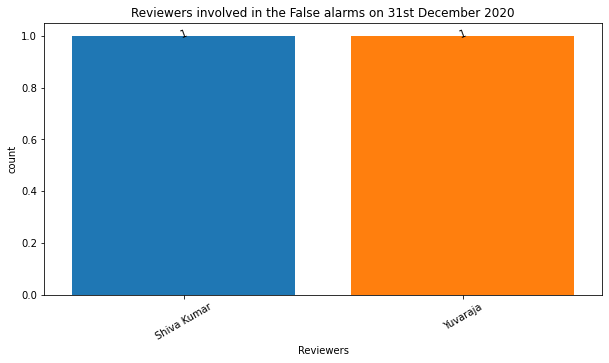

In [15]:
plt.figure(figsize=(10,5))
splot=sns.countplot(data_reviewers_support_December['Reviewers'],order=data_reviewers_support_December['Reviewers'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("Reviewers involved in the False alarms on 31st December 2020", color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

#### Counting the each reviewers false alarms on 31st December 2020
#### 1) Wrong rating  Accident

In [16]:
wrong_rating_accident= data_reviewers_support_December[(data_reviewers_support_December['Rating']=='Wrong rating - Accident')]
wrong_rating_accident

,Date,Link to incident,link to slack,Rating,Reviewers
0,2020-12-31,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Yuvaraja


In [17]:
wrong_rating_accident['Reviewers'].value_counts()

Yuvaraja    1
Name: Reviewers, dtype: int64

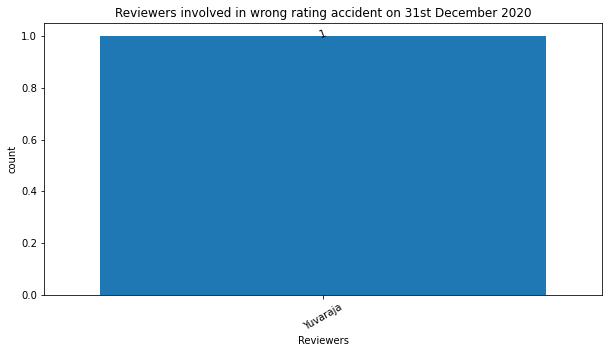

In [18]:
plt.figure(figsize=(10,5))
splot=sns.countplot(wrong_rating_accident['Reviewers'],order=wrong_rating_accident['Reviewers'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("Reviewers involved in wrong rating accident on 31st December 2020", color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

#### 2) Wrong rating no accident

In [19]:
wrong_rating_no_accident= data_reviewers_support_December[(data_reviewers_support_December['Rating']=='Wrong rating - No accident')]
wrong_rating_no_accident

,Date,Link to incident,link to slack,Rating,Reviewers
1,2020-12-31,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Shiva Kumar


In [20]:
wrong_rating_no_accident['Reviewers'].value_counts()

Shiva Kumar    1
Name: Reviewers, dtype: int64

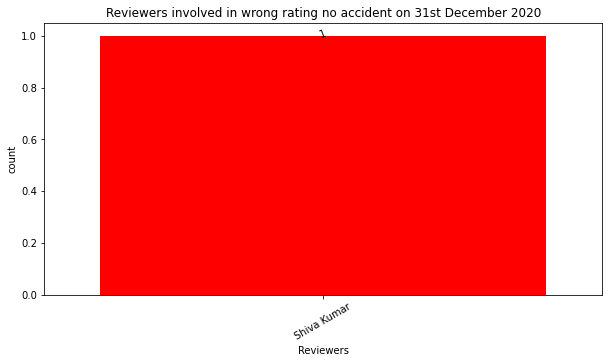

In [21]:
plt.figure(figsize=(10,5))
splot=sns.countplot(wrong_rating_no_accident['Reviewers'],order=wrong_rating_no_accident['Reviewers'].value_counts().index,saturation=10,color='red')
plt.xticks(rotation=30)
plt.title("Reviewers involved in wrong rating no accident on 31st December 2020", color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

## 3) Analysis of the ratings and reviewers in the month of January 2021

In [22]:
data_reviewers_support_January=data_reviewers_support[(data_reviewers_support['Date'] >= '2021-01-01') & (data_reviewers_support['Date'] <= '2021-01-31')]
data_reviewers_support_January

,Date,Link to incident,link to slack,Rating,Reviewers
2,2021-01-01,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Shiva Kumar
3,2021-01-01,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Shiva Kumar
4,2021-01-01,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Rajeshwari
5,2021-01-02,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Rajeshwari
6,2021-01-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Narendra
7,2021-01-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Narendra
8,2021-01-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Aparna
9,2021-01-04,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Yuvaraja
10,2021-01-04,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Mallikarjun
11,2021-01-04,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Yuvaraja


In [23]:
data_reviewers_support_January.shape

(57, 5)

In [24]:
data_reviewers_support_January.size

285

In [25]:
data_reviewers_support_January.isna().sum().to_frame().T

,Date,Link to incident,link to slack,Rating,Reviewers
0,0,6,0,0,2


#### Checking total false alarms in the month of January 2021

In [26]:
data_reviewers_support_January['Rating'].unique()

array(['Wrong rating - Accident', 'Wrong rating - No accident',
       'missed accident', 'No support', 'missed collision'], dtype=object)

In [27]:
data_reviewers_support_January['Rating'].value_counts()

Wrong rating - Accident       20
Wrong rating - No accident    19
missed collision               8
missed accident                7
No support                     3
Name: Rating, dtype: int64

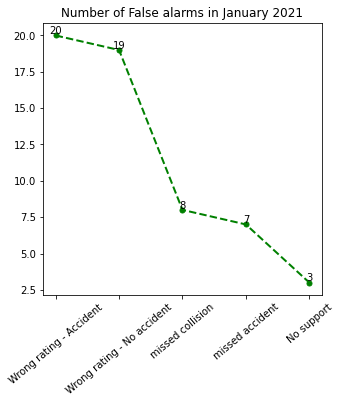

In [28]:
X=data_reviewers_support_January['Rating'].value_counts()
plt.figure(figsize=(5,5))
plt.plot(X,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=40)
plt.title("Number of False alarms in January 2021", color='black')
for i, v in enumerate(X):
    plt.text(i, v+0.09, "%d" %v, ha="center")
plt.show()

In [29]:
data_reviewers_support_January['Rating'].count()

57

#### Checking for the reviewers involved in the false alarms for the January 2021

In [30]:
data_reviewers_support_January['Reviewers'].unique()

array(['Shiva Kumar', 'Rajeshwari', 'Narendra', 'Aparna', 'Yuvaraja',
       'Mallikarjun', 'Shivam', 'Kiran', nan], dtype=object)

In [31]:
data_reviewers_support_January['Reviewers'].value_counts()

Shiva Kumar    11
Rajeshwari     11
Mallikarjun     9
Yuvaraja        7
Narendra        7
Aparna          5
Shivam          3
Kiran           2
Name: Reviewers, dtype: int64

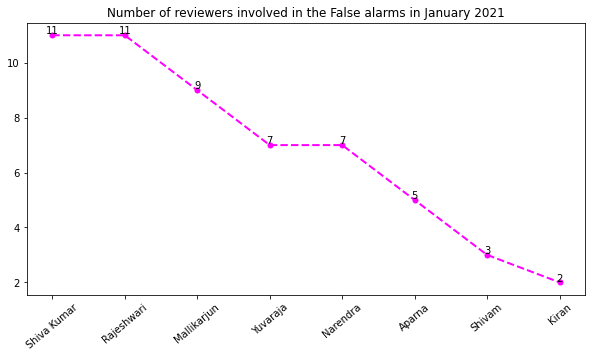

In [32]:
X=data_reviewers_support_January['Reviewers'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(X,color='magenta', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=40)
plt.title("Number of reviewers involved in the False alarms in January 2021", color='black')
for i, v in enumerate(X):
    plt.text(i, v+0.04, "%d" %v, ha="center")
plt.show()

In [33]:
data_reviewers_support_January['Reviewers'].count()

55

#### Counting the each reviewers false alarms for the January 2021
#### 1) Wrong rating no accident

In [34]:
wrong_rating_no_accident= data_reviewers_support_January[(data_reviewers_support_January['Rating']=='Wrong rating - No accident')]
wrong_rating_no_accident

,Date,Link to incident,link to slack,Rating,Reviewers
3,2021-01-01,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Shiva Kumar
4,2021-01-01,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Rajeshwari
8,2021-01-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Aparna
12,2021-01-05,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Mallikarjun
13,2021-01-05,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Rajeshwari
14,2021-01-07,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Shiva Kumar
15,2021-01-08,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Rajeshwari
16,2021-01-09,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Aparna
17,2021-01-10,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Rajeshwari
24,2021-01-12,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Shivam


In [35]:
wrong_rating_no_accident['Reviewers'].value_counts()

Rajeshwari     6
Aparna         3
Shiva Kumar    3
Mallikarjun    3
Narendra       2
Kiran          1
Shivam         1
Name: Reviewers, dtype: int64

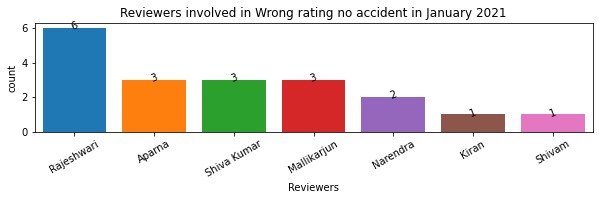

In [36]:
plt.figure(figsize=(10,2))
splot=sns.countplot(wrong_rating_no_accident['Reviewers'],order=wrong_rating_no_accident['Reviewers'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("Reviewers involved in Wrong rating no accident in January 2021", color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

In [37]:
wrong_rating_no_accident['Reviewers'].count()

19

#### 2) Missed Collision

In [38]:
missed_collision= data_reviewers_support_January[(data_reviewers_support_January['Rating']=='missed collision')]
missed_collision

,Date,Link to incident,link to slack,Rating,Reviewers
49,2021-01-24,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Mallikarjun
50,2021-01-24,NaN,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Narendra
51,2021-01-24,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Yuvaraja
52,2021-01-25,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Narendra
53,2021-01-25,NaN,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Mallikarjun
55,2021-01-27,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Shiva Kumar
56,2021-01-27,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Yuvaraja
57,2021-01-27,NaN,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Yuvaraja


In [39]:
missed_collision['Reviewers'].value_counts()

Yuvaraja       3
Mallikarjun    2
Narendra       2
Shiva Kumar    1
Name: Reviewers, dtype: int64

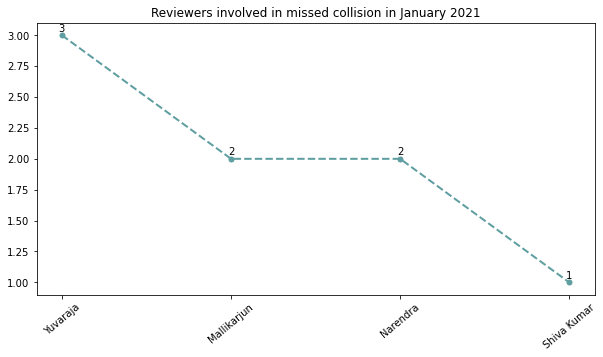

In [40]:
x=missed_collision['Reviewers'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(x,color='cadetblue', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=40)
plt.title("Reviewers involved in missed collision in January 2021", color='black')
for i, v in enumerate(x):
    plt.text(i, v+0.03, "%d" %v, ha="center")
plt.show()

In [41]:
missed_collision['Reviewers'].count()

8

#### 3) No support

In [42]:
no_support= data_reviewers_support_January[(data_reviewers_support_January['Rating']=='No support')]
no_support

,Date,Link to incident,link to slack,Rating,Reviewers
46,2021-01-20,NaN,https://nexar.slack.com/archives/C01ESDUFXT4/p...,No support,NaN
47,2021-01-20,NaN,https://nexar.slack.com/archives/C01ESDUFXT4/p...,No support,NaN
54,2021-01-25,NaN,https://nexar.slack.com/archives/C01ESDUFXT4/p...,No support,Shiva Kumar


In [43]:
no_support['Reviewers'].value_counts()

Shiva Kumar    1
Name: Reviewers, dtype: int64

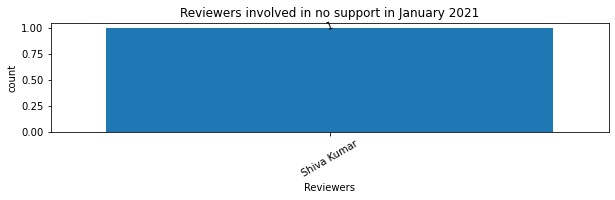

In [44]:
plt.figure(figsize=(10,2))
splot=sns.countplot(no_support['Reviewers'],order=no_support['Reviewers'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("Reviewers involved in no support in January 2021", color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

#### 4) Wrong rating Accident

In [45]:
wrong_rating_accident= data_reviewers_support_January[(data_reviewers_support_January['Rating']=='Wrong rating - Accident')]
wrong_rating_accident

,Date,Link to incident,link to slack,Rating,Reviewers
2,2021-01-01,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Shiva Kumar
5,2021-01-02,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Rajeshwari
6,2021-01-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Narendra
7,2021-01-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Narendra
9,2021-01-04,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Yuvaraja
10,2021-01-04,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Mallikarjun
11,2021-01-04,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Yuvaraja
22,2021-01-11,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Rajeshwari
23,2021-01-12,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Aparna
26,2021-01-12,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Mallikarjun


In [46]:
wrong_rating_accident['Reviewers'].value_counts()

Shiva Kumar    5
Rajeshwari     4
Yuvaraja       3
Aparna         2
Mallikarjun    2
Narendra       2
Kiran          1
Shivam         1
Name: Reviewers, dtype: int64

In [47]:
wrong_rating_accident['Reviewers'].count()

20

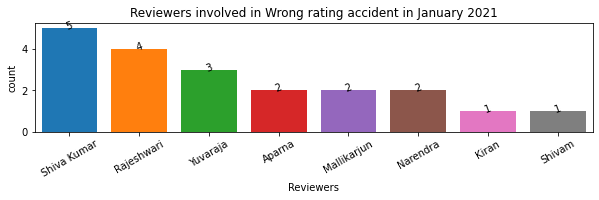

In [48]:
plt.figure(figsize=(10,2))
splot=sns.countplot(wrong_rating_accident['Reviewers'],order=wrong_rating_accident['Reviewers'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("Reviewers involved in Wrong rating accident in January 2021", color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

#### 5) Missed accident

In [49]:
missed_accident= data_reviewers_support_January[(data_reviewers_support_January['Rating']=='missed accident')]
missed_accident

,Date,Link to incident,link to slack,Rating,Reviewers
18,2021-01-11,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,missed accident,Yuvaraja
19,2021-01-11,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,missed accident,Shiva Kumar
20,2021-01-11,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,missed accident,Rajeshwari
21,2021-01-11,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,missed accident,Mallikarjun
25,2021-01-12,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,missed accident,Mallikarjun
44,2021-01-17,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed accident,Shivam
45,2021-01-18,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed accident,Narendra


In [50]:
missed_accident['Reviewers'].value_counts()

Mallikarjun    2
Yuvaraja       1
Rajeshwari     1
Narendra       1
Shiva Kumar    1
Shivam         1
Name: Reviewers, dtype: int64

In [51]:
missed_accident['Reviewers'].count()

7

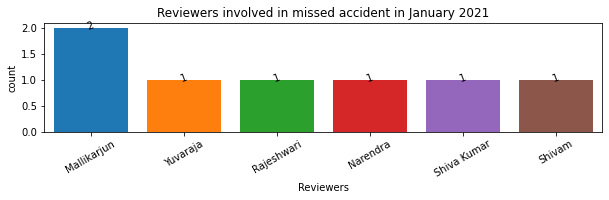

In [52]:
plt.figure(figsize=(10,2))
splot=sns.countplot(missed_accident['Reviewers'],order=missed_accident['Reviewers'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("Reviewers involved in missed accident in January 2021", color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

## 4) Analysis of the ratings and remarks in the month of February 2021

In [53]:
data_reviewers_support_February=data_reviewers_support[(data_reviewers_support['Date'] >= '2021-02-01') & (data_reviewers_support['Date'] <= '2021-02-28')]
data_reviewers_support_February.head()

,Date,Link to incident,link to slack,Rating,Reviewers
59,2021-02-01,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Shivam
60,2021-02-01,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Aparna
61,2021-02-02,NaN,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Aparna
62,2021-02-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Yuvaraja
63,2021-02-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Aparna


In [54]:
data_reviewers_support_February.shape

(38, 5)

In [55]:
data_reviewers_support_February.size

190

In [56]:
data_reviewers_support_February.isna().sum().to_frame().T

,Date,Link to incident,link to slack,Rating,Reviewers
0,0,8,0,0,0


#### Checking total false alarms in the month of February 2021

In [57]:
data_reviewers_support_February['Rating'].unique()

array(['missed collision', 'Wrong rating - No accident',
       'grabbed no submitted review', 'No support',
       'Wrong rating - Accident',
       'P1 missed accident - review resubmitted'], dtype=object)

In [58]:
data_reviewers_support_February['Rating'].value_counts()

missed collision                           24
Wrong rating - No accident                  8
Wrong rating - Accident                     2
No support                                  2
P1 missed accident - review resubmitted     1
grabbed no submitted review                 1
Name: Rating, dtype: int64

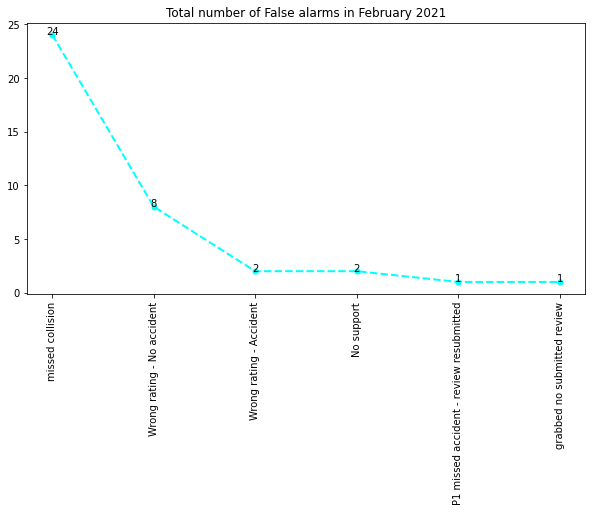

In [59]:
x=data_reviewers_support_February['Rating'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(x,color='cyan', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=90)
plt.title("Total number of False alarms in February 2021", color='black')
for i, v in enumerate(x):
    plt.text(i, v+0.03, "%d" %v, ha="center")
plt.show()

In [60]:
data_reviewers_support_February['Rating'].count()

38

#### Checking for the reviewers involved in the false alarms for the February 2021

In [61]:
data_reviewers_support_February['Reviewers'].unique()

array(['Shivam', 'Aparna', 'Yuvaraja', 'Rajeshwari', 'Narendra',
       'Shiva Kumar', 'Kiran'], dtype=object)

In [62]:
data_reviewers_support_February['Reviewers'].value_counts()

Aparna         11
Shivam          9
Yuvaraja        5
Rajeshwari      4
Shiva Kumar     3
Narendra        3
Kiran           3
Name: Reviewers, dtype: int64

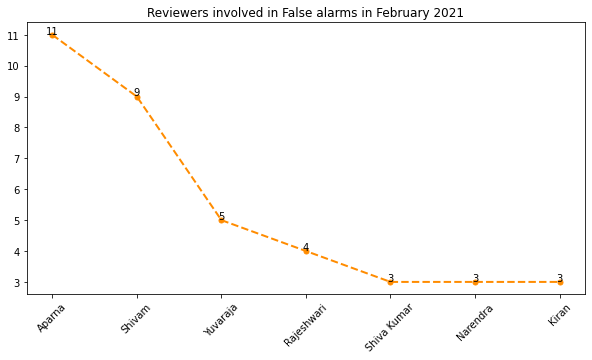

In [63]:
x=data_reviewers_support_February['Reviewers'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(x,color='darkorange', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=45)
plt.title("Reviewers involved in False alarms in February 2021", color='black')
for i, v in enumerate(x):
    plt.text(i, v+0.03, "%d" %v, ha="center")
plt.show()

In [64]:
data_reviewers_support_February['Reviewers'].count()

38

#### Counting the each reviewers false alarms for the February 2021
#### 1) missed collision

In [65]:
missed_collision= data_reviewers_support_February[(data_reviewers_support_February['Rating']=='missed collision')]
missed_collision

,Date,Link to incident,link to slack,Rating,Reviewers
59,2021-02-01,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Shivam
60,2021-02-01,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Aparna
61,2021-02-02,NaN,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Aparna
62,2021-02-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Yuvaraja
63,2021-02-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Aparna
64,2021-02-03,NaN,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Aparna
65,2021-02-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Yuvaraja
66,2021-02-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Aparna
67,2021-02-04,NaN,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Yuvaraja
72,2021-02-05,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Aparna


In [66]:
missed_collision['Reviewers'].value_counts()

Aparna         8
Shivam         5
Yuvaraja       4
Rajeshwari     3
Narendra       2
Shiva Kumar    1
Kiran          1
Name: Reviewers, dtype: int64

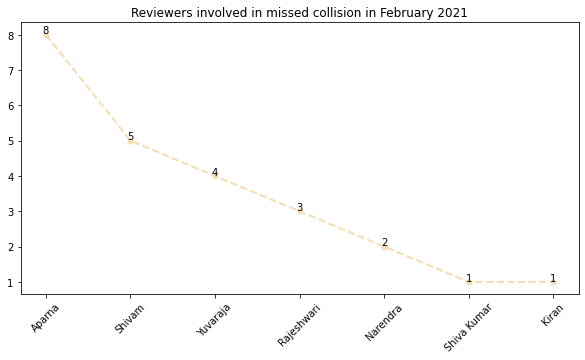

In [67]:
x=missed_collision['Reviewers'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(x,color='wheat', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=45)
plt.title("Reviewers involved in missed collision in February 2021", color='black')
for i, v in enumerate(x):
    plt.text(i, v+0.03, "%d" %v, ha="center")
plt.show()

In [68]:
missed_collision['Reviewers'].count()

24

#### 2) Wrong rating - No accident

In [69]:
wrong_rating_no_accident= data_reviewers_support_February[(data_reviewers_support_February['Rating']=='Wrong rating - No accident')]
wrong_rating_no_accident

,Date,Link to incident,link to slack,Rating,Reviewers
68,2021-02-04,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Shivam
69,2021-02-04,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Aparna
70,2021-02-04,NaN,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Shivam
71,2021-02-04,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Shivam
89,2021-02-24,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Aparna
90,2021-02-24,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Shivam
91,2021-02-25,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Kiran
92,2021-02-25,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Yuvaraja


In [70]:
wrong_rating_no_accident['Reviewers'].value_counts()

Shivam      4
Aparna      2
Yuvaraja    1
Kiran       1
Name: Reviewers, dtype: int64

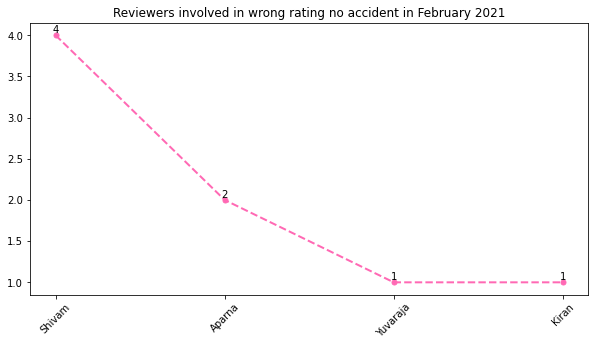

In [71]:
x=wrong_rating_no_accident['Reviewers'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(x,color='hotpink', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=45)
plt.title("Reviewers involved in wrong rating no accident in February 2021", color='black')
for i, v in enumerate(x):
    plt.text(i, v+0.03, "%d" %v, ha="center")
plt.show()

In [72]:
wrong_rating_no_accident['Reviewers'].count()

8

#### 3) Wrong rating - Accident

In [73]:
wrong_rating_accident= data_reviewers_support_February[(data_reviewers_support_February['Rating']=='Wrong rating - Accident')]
wrong_rating_accident

,Date,Link to incident,link to slack,Rating,Reviewers
94,2021-02-27,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Kiran
95,2021-02-27,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Aparna


In [74]:
wrong_rating_accident['Reviewers'].value_counts()

Aparna    1
Kiran     1
Name: Reviewers, dtype: int64

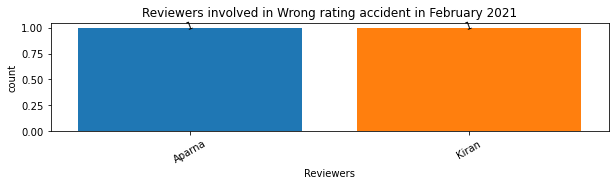

In [75]:
plt.figure(figsize=(10,2))
splot=sns.countplot(wrong_rating_accident['Reviewers'],order=wrong_rating_accident['Reviewers'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("Reviewers involved in Wrong rating accident in February 2021", color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

In [76]:
wrong_rating_accident['Reviewers'].count()

2

#### 4) P1 missed accident - review resubmitted

In [77]:
P1_missed_accident_review_resubmitted= data_reviewers_support_February[(data_reviewers_support_February['Rating']=='P1 missed accident - review resubmitted')]
P1_missed_accident_review_resubmitted

,Date,Link to incident,link to slack,Rating,Reviewers
96,2021-02-28,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,P1 missed accident - review resubmitted,Shiva Kumar


In [78]:
P1_missed_accident_review_resubmitted['Reviewers'].value_counts()

Shiva Kumar    1
Name: Reviewers, dtype: int64

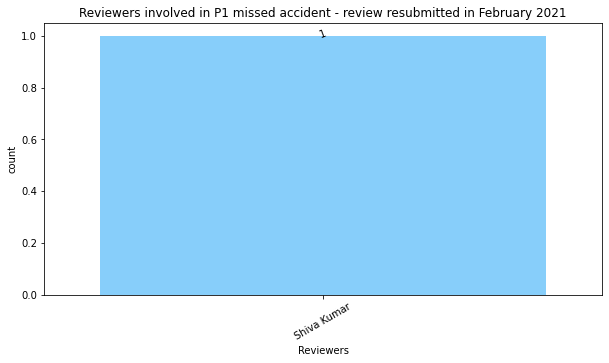

In [79]:
plt.figure(figsize=(10,5))
splot=sns.countplot(P1_missed_accident_review_resubmitted['Reviewers'],order=P1_missed_accident_review_resubmitted['Reviewers'].value_counts().index,saturation=10,color='lightskyblue')
plt.xticks(rotation=30)
plt.title("Reviewers involved in P1 missed accident - review resubmitted in February 2021", color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

#### 5) grabbed no submitted review

In [80]:
grabbed_no_submitted_review= data_reviewers_support_February[(data_reviewers_support_February['Rating']=='grabbed no submitted review')]
grabbed_no_submitted_review

,Date,Link to incident,link to slack,Rating,Reviewers
75,2021-02-06,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01ESDUFXT4/p...,grabbed no submitted review,Narendra


In [81]:
grabbed_no_submitted_review['Reviewers'].value_counts()

Narendra    1
Name: Reviewers, dtype: int64

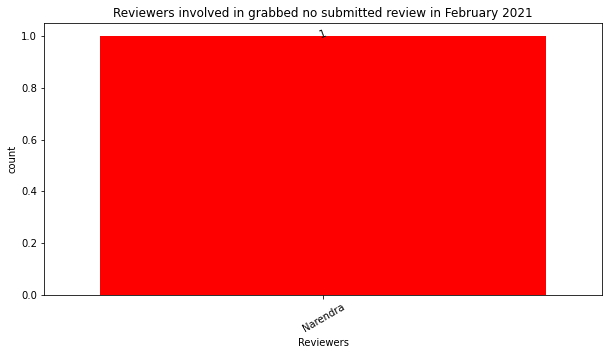

In [82]:
plt.figure(figsize=(10,5))
splot=sns.countplot(grabbed_no_submitted_review['Reviewers'],order=grabbed_no_submitted_review['Reviewers'].value_counts().index,saturation=10,color='red')
plt.xticks(rotation=30)
plt.title("Reviewers involved in grabbed no submitted review in February 2021", color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

#### 6) No support

In [83]:
no_support=data_reviewers_support_February[(data_reviewers_support_February['Rating']=='No support')]
no_support

,Date,Link to incident,link to slack,Rating,Reviewers
76,2021-02-06,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/C01ESDUFXT4/p...,No support,Rajeshwari
77,2021-02-08,NaN,https://nexar.slack.com/archives/C01ESDUFXT4/p...,No support,Shiva Kumar


In [84]:
no_support['Reviewers'].value_counts()

Shiva Kumar    1
Rajeshwari     1
Name: Reviewers, dtype: int64

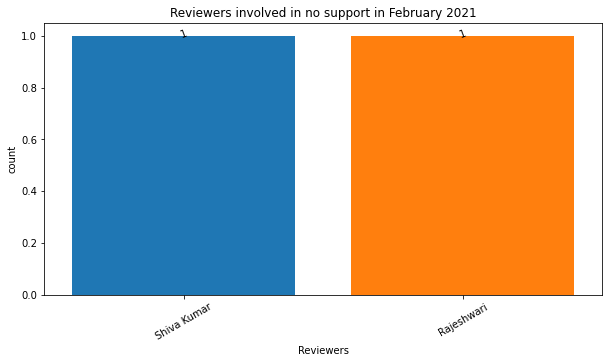

In [85]:
plt.figure(figsize=(10,5))
splot=sns.countplot(no_support['Reviewers'],order=no_support['Reviewers'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("Reviewers involved in no support in February 2021", color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

## 5) Analysis of the ratings and remarks in the month of March 2021

In [86]:
data_reviewers_support_March=data_reviewers_support[(data_reviewers_support['Date'] >= '2021-03-01') & (data_reviewers_support['Date'] <= '2021-03-31')]
data_reviewers_support_March.head()

,Date,Link to incident,link to slack,Rating,Reviewers
97,2021-03-01,NaN,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Shiva Kumar
98,2021-03-02,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - Accident,Aparna
99,2021-03-02,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - Accident,Shivam
100,2021-03-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Narendra
101,2021-03-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Aparna


In [87]:
data_reviewers_support_March.shape

(54, 5)

In [88]:
data_reviewers_support_March.size

270

In [89]:
data_reviewers_support_March.isna().sum().to_frame().T

,Date,Link to incident,link to slack,Rating,Reviewers
0,0,3,0,0,0


#### Checking total false alarms in the month of March 2021

In [90]:
data_reviewers_support_March['Rating'].unique()

array(['Wrong rating - No accident', 'Wrong rating - Accident',
       'Hard to rate incidents', 'last grabbed incident'], dtype=object)

In [91]:
data_reviewers_support_March['Rating'].value_counts()

Wrong rating - Accident       35
Wrong rating - No accident    15
last grabbed incident          2
Hard to rate incidents         2
Name: Rating, dtype: int64

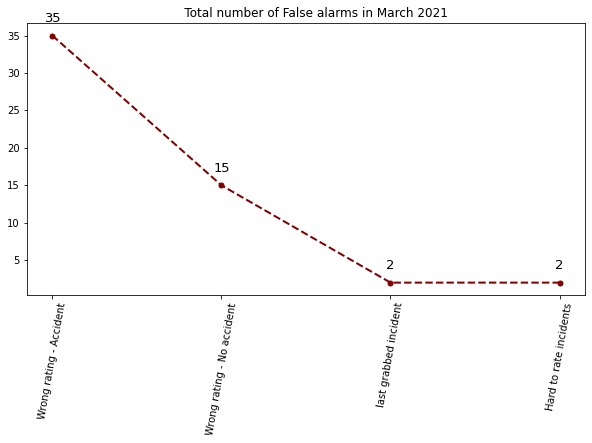

In [92]:
x=data_reviewers_support_March['Rating'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(x,color='maroon', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=80)
plt.title("     Total number of False alarms in March 2021",color='black')
for i, v in enumerate(x):
    plt.text(i, v+1.8, "%d" %v, ha="center",fontdict={'fontsize':'13'})
plt.show()

In [93]:
data_reviewers_support_March['Rating'].count()

54

#### Checking for the reviewers involved in the false alarms for the March 2021

In [94]:
data_reviewers_support_March['Reviewers'].unique()

array(['Shiva Kumar', 'Aparna', 'Shivam', 'Narendra', 'Kiran', 'Yuvaraja',
       'Rajeshwari', 'Mallikarjun'], dtype=object)

In [95]:
data_reviewers_support_March['Reviewers'].value_counts()

Aparna         14
Shivam         13
Kiran           7
Narendra        6
Yuvaraja        5
Shiva Kumar     4
Mallikarjun     3
Rajeshwari      2
Name: Reviewers, dtype: int64

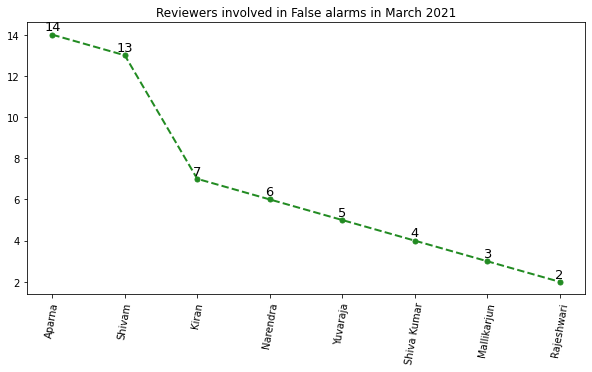

In [96]:
x=data_reviewers_support_March['Reviewers'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(x,color='forestgreen', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=80)
plt.title("Reviewers involved in False alarms in March 2021",color='black')
for i, v in enumerate(x):
    plt.text(i, v+0.2, "%d" %v, ha="center",fontdict={'fontsize':'13'})
plt.show()

In [97]:
data_reviewers_support_March['Reviewers'].count()

54

#### Counting the each reviewers false alarms for the March 2021
#### 1) Wrong rating - Accident 

In [98]:
wrong_rating_accident= data_reviewers_support_March[(data_reviewers_support_March['Rating']=='Wrong rating - Accident')]
wrong_rating_accident.head()

,Date,Link to incident,link to slack,Rating,Reviewers
98,2021-03-02,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - Accident,Aparna
99,2021-03-02,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - Accident,Shivam
100,2021-03-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Narendra
101,2021-03-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Aparna
102,2021-03-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Aparna


In [99]:
wrong_rating_accident['Reviewers'].value_counts()

Aparna         9
Shivam         8
Narendra       5
Kiran          5
Shiva Kumar    3
Yuvaraja       2
Rajeshwari     2
Mallikarjun    1
Name: Reviewers, dtype: int64

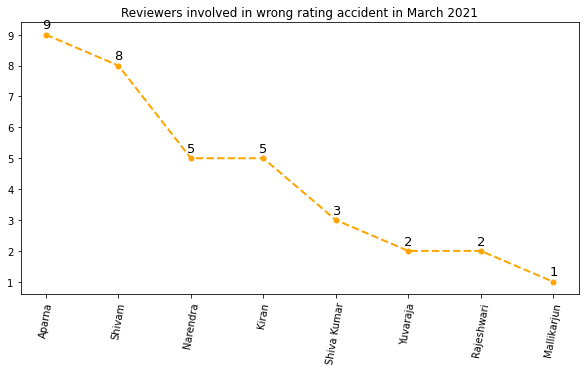

In [100]:
x=wrong_rating_accident['Reviewers'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(x,color='orange', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=80)
plt.title("Reviewers involved in wrong rating accident in March 2021",color='black')
for i, v in enumerate(x):
    plt.text(i, v+0.2, "%d" %v, ha="center",fontdict={'fontsize':'13'})
plt.show()

In [101]:
wrong_rating_accident['Reviewers'].count()

35

#### 2) Wrong rating - No accident

In [102]:
wrong_rating_no_accident= data_reviewers_support_March[(data_reviewers_support_March['Rating']=='Wrong rating - No accident')]
wrong_rating_no_accident

,Date,Link to incident,link to slack,Rating,Reviewers
97,2021-03-01,NaN,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Shiva Kumar
104,2021-03-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Narendra
105,2021-03-04,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Kiran
106,2021-03-04,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Yuvaraja
109,2021-03-05,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Kiran
110,2021-03-05,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Yuvaraja
113,2021-03-06,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Aparna
114,2021-03-06,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Shivam
119,2021-03-13,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Aparna
120,2021-03-13,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Shivam


In [103]:
wrong_rating_no_accident['Reviewers'].value_counts()

Aparna         4
Yuvaraja       3
Shivam         3
Kiran          2
Shiva Kumar    1
Mallikarjun    1
Narendra       1
Name: Reviewers, dtype: int64

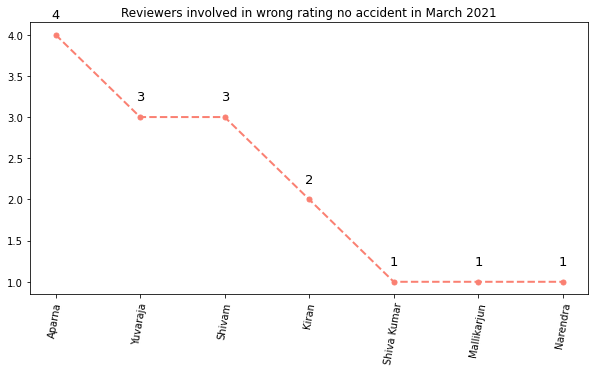

In [104]:
x=wrong_rating_no_accident['Reviewers'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(x,color='salmon', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=80)
plt.title("Reviewers involved in wrong rating no accident in March 2021",color='black')
for i, v in enumerate(x):
    plt.text(i, v+0.2, "%d" %v, ha="center",fontdict={'fontsize':'13'})
plt.show()

In [105]:
wrong_rating_no_accident['Reviewers'].count()

15

#### 3) last grabbed incident

In [106]:
last_grabbed_incident= data_reviewers_support_March[(data_reviewers_support_March['Rating']=='last grabbed incident')]
last_grabbed_incident

,Date,Link to incident,link to slack,Rating,Reviewers
144,2021-03-29,NaN,https://nexar.slack.com/archives/C01ESDUFXT4/p...,last grabbed incident,Shivam
145,2021-03-29,NaN,https://nexar.slack.com/archives/C01ESDUFXT4/p...,last grabbed incident,Mallikarjun


In [107]:
last_grabbed_incident['Reviewers'].value_counts()

Shivam         1
Mallikarjun    1
Name: Reviewers, dtype: int64

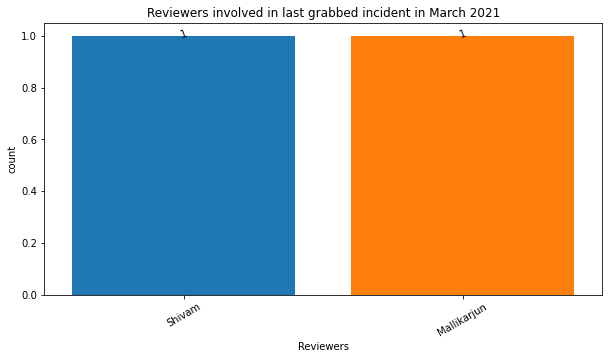

In [108]:
plt.figure(figsize=(10,5))
splot=sns.countplot(last_grabbed_incident['Reviewers'],order=last_grabbed_incident['Reviewers'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("Reviewers involved in last grabbed incident in March 2021",color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

In [109]:
last_grabbed_incident['Reviewers'].count()

2

#### 4) Hard to rate incidents

In [110]:
Hard_to_rate_incidents= data_reviewers_support_March[(data_reviewers_support_March['Rating']=='Hard to rate incidents')]
Hard_to_rate_incidents

,Date,Link to incident,link to slack,Rating,Reviewers
123,2021-03-14,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Hard to rate incidents,Aparna
124,2021-03-14,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Hard to rate incidents,Shivam


In [111]:
Hard_to_rate_incidents['Reviewers'].value_counts()

Aparna    1
Shivam    1
Name: Reviewers, dtype: int64

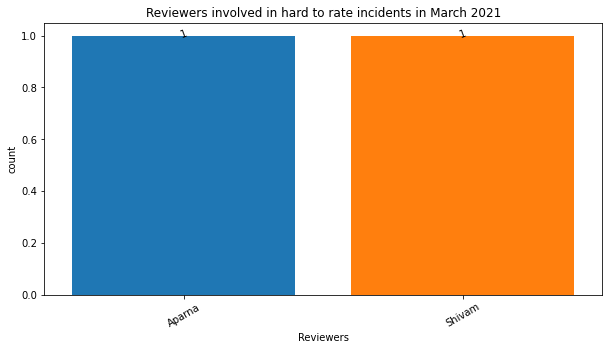

In [112]:
plt.figure(figsize=(10,5))
splot=sns.countplot(Hard_to_rate_incidents['Reviewers'],order=Hard_to_rate_incidents['Reviewers'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("Reviewers involved in hard to rate incidents in March 2021",color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

In [113]:
Hard_to_rate_incidents['Reviewers'].count()

2

## 6) Analysis of the ratings and remarks in the month of April 2021

In [114]:
data_reviewers_support_April=data_reviewers_support[(data_reviewers_support['Date'] >= '2021-04-01') & (data_reviewers_support['Date'] <= '2021-04-30')]
data_reviewers_support_April.head()

,Date,Link to incident,link to slack,Rating,Reviewers
151,2021-04-04,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - Accident,Shivam
152,2021-04-04,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - Accident,Aparna
153,2021-04-04,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Aparna
154,2021-04-05,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Leenu
155,2021-04-05,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Shiva Kumar


In [115]:
data_reviewers_support_April.shape

(24, 5)

In [116]:
data_reviewers_support_April.size

120

In [117]:
data_reviewers_support_April.isna().sum().to_frame().T

,Date,Link to incident,link to slack,Rating,Reviewers
0,0,3,0,0,0


#### Checking total false alarms in the month of April 2021

In [118]:
data_reviewers_support_April['Rating'].unique()

array(['Wrong rating - Accident', 'Wrong rating - No accident',
       'No support'], dtype=object)

In [119]:
data_reviewers_support_April['Rating'].value_counts()

Wrong rating - Accident       13
Wrong rating - No accident     8
No support                     3
Name: Rating, dtype: int64

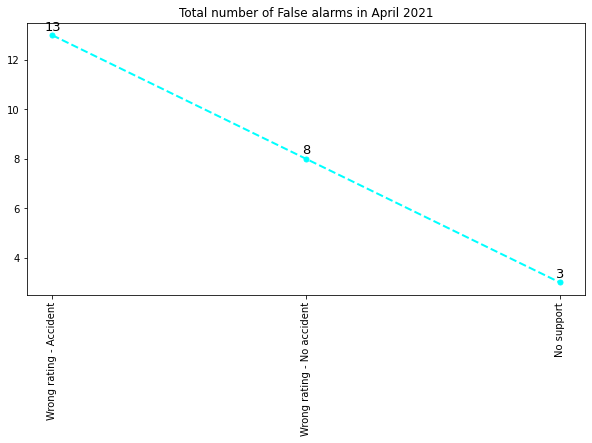

In [120]:
x=data_reviewers_support_April['Rating'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(x,color='aqua', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=90)
plt.title("Total number of False alarms in April 2021",color='black')
for i, v in enumerate(x):
    plt.text(i, v+0.2, "%d" %v, ha="center",fontdict={'fontsize':'13'})
plt.show()

In [121]:
data_reviewers_support_April['Rating'].count()

24

#### Checking for the reviewers involved in the false alarms for the April 2021

In [122]:
data_reviewers_support_April['Reviewers'].unique()

array(['Shivam', 'Aparna', 'Leenu', 'Shiva Kumar', 'Raushan', 'Yuvaraja',
       'Rajeshwari', 'Mallikarjun'], dtype=object)

In [123]:
data_reviewers_support_April['Reviewers'].value_counts()

Aparna         7
Raushan        5
Shivam         4
Shiva Kumar    3
Leenu          2
Yuvaraja       1
Mallikarjun    1
Rajeshwari     1
Name: Reviewers, dtype: int64

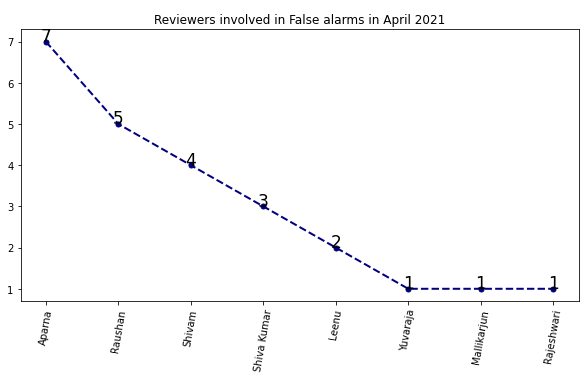

In [124]:
x=data_reviewers_support_April['Reviewers'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(x,color='navy', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=80)
plt.title("Reviewers involved in False alarms in April 2021",color='black')
for i, v in enumerate(x):
    plt.text(i, v+0.01, "\n%d" %v, ha="center",fontdict={'fontsize':'17'})
plt.show()

In [125]:
data_reviewers_support_April['Reviewers'].count()

24

#### Counting the each reviewers false alarms for the April 2021
#### 1) Wrong rating - Accident

In [126]:
wrong_rating_accident= data_reviewers_support_April[(data_reviewers_support_April['Rating']=='Wrong rating - Accident')]
wrong_rating_accident

,Date,Link to incident,link to slack,Rating,Reviewers
151,2021-04-04,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - Accident,Shivam
152,2021-04-04,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - Accident,Aparna
158,2021-04-07,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - Accident,Raushan
159,2021-04-07,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - Accident,Aparna
162,2021-04-10,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Raushan
163,2021-04-10,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Aparna
164,2021-04-11,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Raushan
168,2021-04-14,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - Accident,Raushan
169,2021-04-14,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - Accident,Aparna
170,2021-04-15,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Shivam


In [127]:
wrong_rating_accident['Reviewers'].value_counts()

Aparna         5
Raushan        4
Shivam         2
Rajeshwari     1
Mallikarjun    1
Name: Reviewers, dtype: int64

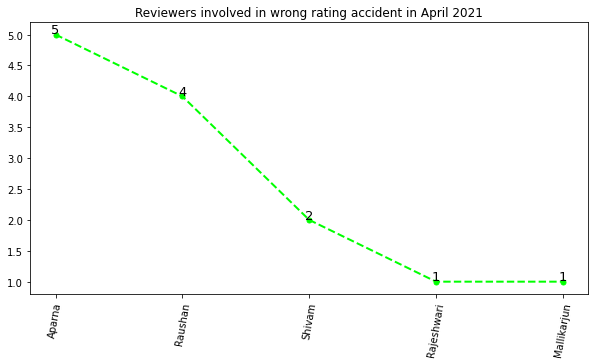

In [128]:
x=wrong_rating_accident['Reviewers'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(x,color='lime', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=80)
plt.title("Reviewers involved in wrong rating accident in April 2021",color='black')
for i, v in enumerate(x):
    plt.text(i, v+0.02, "\n%d" %v, ha="center",fontdict={'fontsize':'13'})
plt.show()

In [129]:
wrong_rating_accident['Reviewers'].count()

13

#### 2) Wrong rating - No accident

In [130]:
wrong_rating_no_accident= data_reviewers_support_April[(data_reviewers_support_April['Rating']=='Wrong rating - No accident')]
wrong_rating_no_accident

,Date,Link to incident,link to slack,Rating,Reviewers
153,2021-04-04,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Aparna
154,2021-04-05,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Leenu
155,2021-04-05,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Shiva Kumar
156,2021-04-06,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Leenu
157,2021-04-06,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Shiva Kumar
160,2021-04-08,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Raushan
161,2021-04-08,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Aparna
172,2021-04-15,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,Wrong rating - No accident,Yuvaraja


In [131]:
wrong_rating_no_accident['Reviewers'].value_counts()

Leenu          2
Aparna         2
Shiva Kumar    2
Yuvaraja       1
Raushan        1
Name: Reviewers, dtype: int64

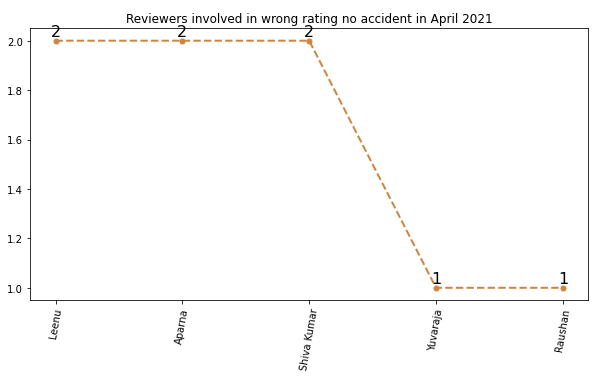

In [132]:
x=wrong_rating_no_accident['Reviewers'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(x,color='peru', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=80)
plt.title("Reviewers involved in wrong rating no accident in April 2021",color='black')
for i, v in enumerate(x):
    plt.text(i, v+0.02, "\n%d" %v, ha="center",fontdict={'fontsize':'16'})
plt.show()

In [133]:
wrong_rating_no_accident['Reviewers'].count()

8

#### 3) No support

In [134]:
no_support= data_reviewers_support_April[(data_reviewers_support_April['Rating']=='No support')]
no_support

,Date,Link to incident,link to slack,Rating,Reviewers
165,2021-04-12,NaN,https://nexar.slack.com/archives/C01ESDUFXT4/p...,No support,Shivam
166,2021-04-12,NaN,https://nexar.slack.com/archives/C01ESDUFXT4/p...,No support,Shivam
167,2021-04-13,NaN,https://nexar.slack.com/archives/C01ESDUFXT4/p...,No support,Shiva Kumar


In [135]:
no_support['Reviewers'].value_counts()

Shivam         2
Shiva Kumar    1
Name: Reviewers, dtype: int64

In [136]:
no_support['Reviewers'].count()

3

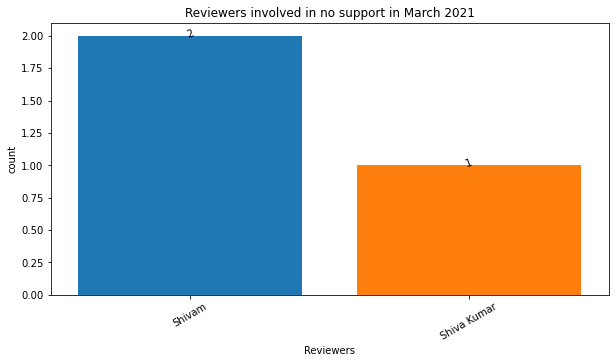

In [137]:
plt.figure(figsize=(10,5))
splot=sns.countplot(no_support['Reviewers'],order=no_support['Reviewers'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("Reviewers involved in no support in March 2021",color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

## 7) Total analysis of the ratings and remarks
####  Checking total false alarms from 31st December 2020 to April 2021

In [138]:
data_reviewers_support['Rating'].unique()

array(['Wrong rating - Accident', 'Wrong rating - No accident',
       'missed accident', 'No support', 'missed collision',
       'grabbed no submitted review',
       'P1 missed accident - review resubmitted',
       'Hard to rate incidents', 'last grabbed incident'], dtype=object)

In [139]:
data_reviewers_support['Rating'].value_counts()

Wrong rating - Accident                    71
Wrong rating - No accident                 51
missed collision                           32
No support                                  8
missed accident                             7
last grabbed incident                       2
Hard to rate incidents                      2
P1 missed accident - review resubmitted     1
grabbed no submitted review                 1
Name: Rating, dtype: int64

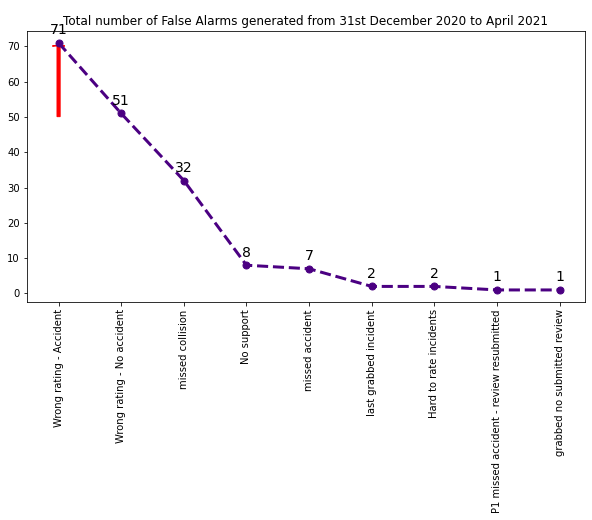

In [140]:
X=data_reviewers_support['Rating'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(X,color='indigo', marker='o', linestyle='dashed',linewidth=3, markersize=7)
plt.xticks(rotation=90)
plt.title("Total number of False Alarms generated from 31st December 2020 to April 2021",color='black')
plt.arrow(0, 50.1, 0, 20, head_width = 0.2,width = 0.05,ec ='red',fc='red')
for i, v in enumerate(X):
    plt.text(i, v+2.4, "\n%d" %v, ha="center",fontdict={'fontsize':'14'})
plt.show()

#### Checking for the reviewers involved in the false alarms from January 2021 to April 2021

In [141]:
data_reviewers_support['Reviewers'].unique()

array(['Yuvaraja', 'Shiva Kumar', 'Rajeshwari', 'Narendra', 'Aparna',
       'Mallikarjun', 'Shivam', 'Kiran', nan, 'Leenu', 'Raushan'],
      dtype=object)

In [142]:
data_reviewers_support['Reviewers'].value_counts()

Aparna         37
Shivam         29
Shiva Kumar    22
Yuvaraja       19
Rajeshwari     18
Narendra       16
Mallikarjun    13
Kiran          12
Raushan         5
Leenu           2
Name: Reviewers, dtype: int64

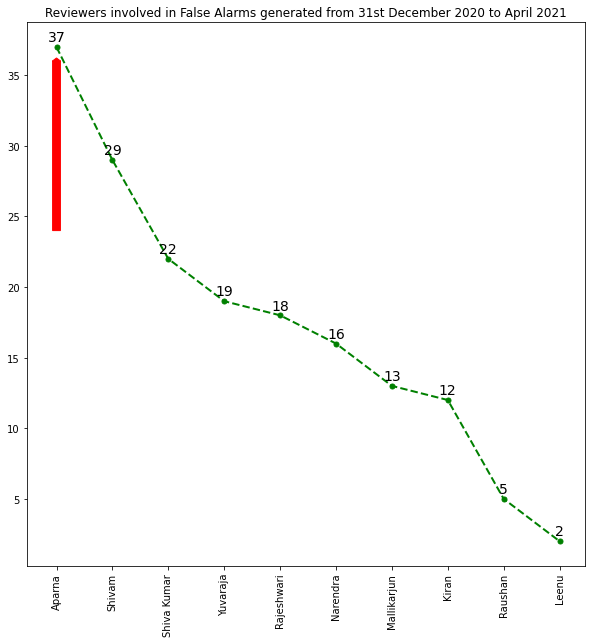

In [143]:
X=data_reviewers_support['Reviewers'].value_counts()
plt.figure(figsize=(10,10))
plt.plot(X,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=90)
plt.arrow(0, 24, 0, 12, head_width = 0.15,width = 0.14,ec ='red',fc='red')
plt.title("Reviewers involved in False Alarms generated from 31st December 2020 to April 2021",color='black')
for i, v in enumerate(X):
    plt.text(i, v+.4, "\n%d" %v, ha="center",fontdict={'fontsize':'14'})
plt.show()

#### Counting the each reviewers false alarms from January 2021 to April 2021
#### 1) Wrong rating - Accident

In [144]:
wrong_rating_accident= data_reviewers_support[(data_reviewers_support['Rating']=='Wrong rating - Accident')]
wrong_rating_accident.head()

,Date,Link to incident,link to slack,Rating,Reviewers
0,2020-12-31,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Yuvaraja
2,2021-01-01,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Shiva Kumar
5,2021-01-02,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Rajeshwari
6,2021-01-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Narendra
7,2021-01-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - Accident,Narendra


In [145]:
wrong_rating_accident['Reviewers'].value_counts()

Aparna         17
Shivam         11
Shiva Kumar     8
Rajeshwari      7
Narendra        7
Kiran           7
Yuvaraja        6
Raushan         4
Mallikarjun     4
Name: Reviewers, dtype: int64

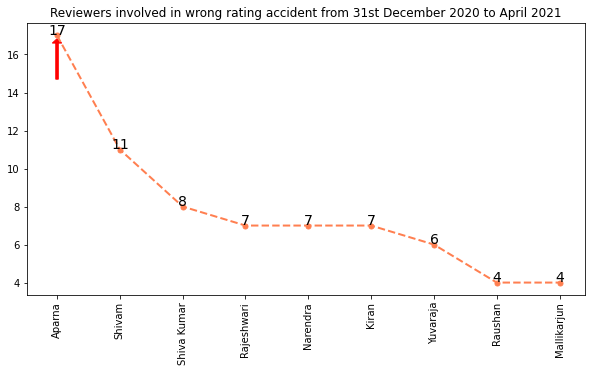

In [146]:
X=wrong_rating_accident['Reviewers'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(X,color='coral', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=90)
plt.title("Reviewers involved in wrong rating accident from 31st December 2020 to April 2021",color='black')
plt.arrow(0, 14.7, 0, 1.9, head_width = 0.15,width = 0.04,ec ='red',fc='red')
for i, v in enumerate(X):
    plt.text(i, v+0.04, "\n%d" %v, ha="center",fontdict={'fontsize':'14'})
plt.show()

In [147]:
wrong_rating_accident['Reviewers'].count()

71

#### 2) Wrong rating - No accident

In [148]:
wrong_rating_no_accident= data_reviewers_support[(data_reviewers_support['Rating']=='Wrong rating - No accident')]
wrong_rating_no_accident.head()

,Date,Link to incident,link to slack,Rating,Reviewers
1,2020-12-31,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Shiva Kumar
3,2021-01-01,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Shiva Kumar
4,2021-01-01,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Rajeshwari
8,2021-01-03,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Aparna
12,2021-01-05,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Wrong rating - No accident,Mallikarjun


In [149]:
wrong_rating_no_accident['Reviewers'].value_counts()

Aparna         11
Shivam          8
Shiva Kumar     7
Rajeshwari      6
Yuvaraja        5
Mallikarjun     4
Kiran           4
Narendra        3
Leenu           2
Raushan         1
Name: Reviewers, dtype: int64

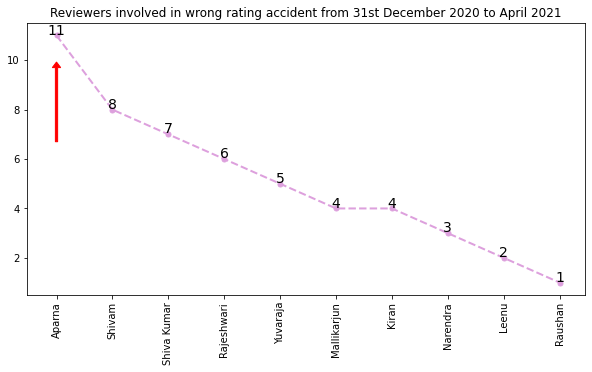

In [150]:
X=wrong_rating_no_accident['Reviewers'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(X,color='plum', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=90)
plt.arrow(0, 6.7, 0, 3.0, head_width = 0.15,width = 0.04,ec ='red',fc='red')
plt.title("Reviewers involved in wrong rating accident from 31st December 2020 to April 2021",color='black')
for i, v in enumerate(X):
    plt.text(i, v+0.04, "\n%d" %v, ha="center",fontdict={'fontsize':'14'})
plt.show()

In [151]:
wrong_rating_no_accident['Reviewers'].count()

51

#### 3) missed collision

In [152]:
missed_collision= data_reviewers_support[(data_reviewers_support['Rating']=='missed collision')]
missed_collision.head()

,Date,Link to incident,link to slack,Rating,Reviewers
49,2021-01-24,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Mallikarjun
50,2021-01-24,NaN,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Narendra
51,2021-01-24,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Yuvaraja
52,2021-01-25,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Narendra
53,2021-01-25,NaN,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed collision,Mallikarjun


In [153]:
missed_collision['Reviewers'].value_counts()

Aparna         8
Yuvaraja       7
Shivam         5
Narendra       4
Rajeshwari     3
Shiva Kumar    2
Mallikarjun    2
Kiran          1
Name: Reviewers, dtype: int64

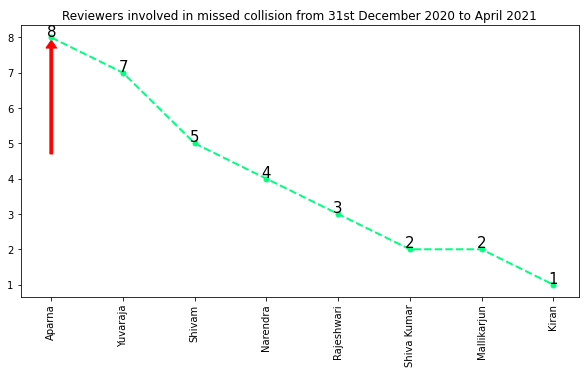

In [154]:
X=missed_collision['Reviewers'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(X,color='springgreen', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=90)
plt.arrow(0, 4.7, 0, 3.0, head_width = 0.15,width = 0.04,ec ='red',fc='red')
plt.title("Reviewers involved in missed collision from 31st December 2020 to April 2021",color='black')
for i, v in enumerate(X):
    plt.text(i, v+0.04, "\n%d" %v, ha="center",fontdict={'fontsize':'15'})
plt.show()

In [155]:
missed_collision['Reviewers'].count()

32

#### 4) last grabbed incident

In [156]:
last_grabbed_incident=data_reviewers_support[(data_reviewers_support['Rating']=='last grabbed incident')]
last_grabbed_incident.head()

,Date,Link to incident,link to slack,Rating,Reviewers
144,2021-03-29,NaN,https://nexar.slack.com/archives/C01ESDUFXT4/p...,last grabbed incident,Shivam
145,2021-03-29,NaN,https://nexar.slack.com/archives/C01ESDUFXT4/p...,last grabbed incident,Mallikarjun


In [157]:
last_grabbed_incident['Reviewers'].value_counts()

Shivam         1
Mallikarjun    1
Name: Reviewers, dtype: int64

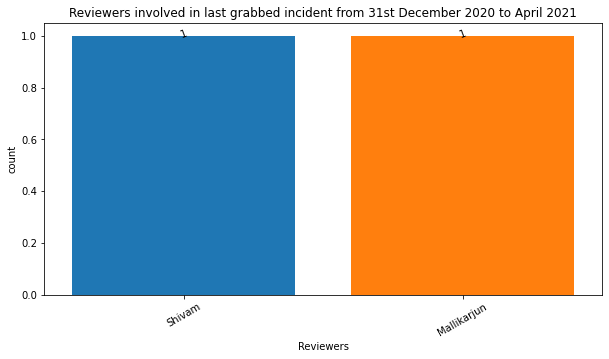

In [158]:
plt.figure(figsize=(10,5))
splot=sns.countplot(last_grabbed_incident['Reviewers'],order=last_grabbed_incident['Reviewers'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("Reviewers involved in last grabbed incident from 31st December 2020 to April 2021",color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

In [159]:
last_grabbed_incident['Reviewers'].count()

2

#### 5) Hard to rate incidents

In [160]:
Hard_to_rate_incidents=data_reviewers_support[(data_reviewers_support['Rating']=='Hard to rate incidents')]
Hard_to_rate_incidents.head()

,Date,Link to incident,link to slack,Rating,Reviewers
123,2021-03-14,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Hard to rate incidents,Aparna
124,2021-03-14,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,Hard to rate incidents,Shivam


In [161]:
Hard_to_rate_incidents['Reviewers'].value_counts()

Aparna    1
Shivam    1
Name: Reviewers, dtype: int64

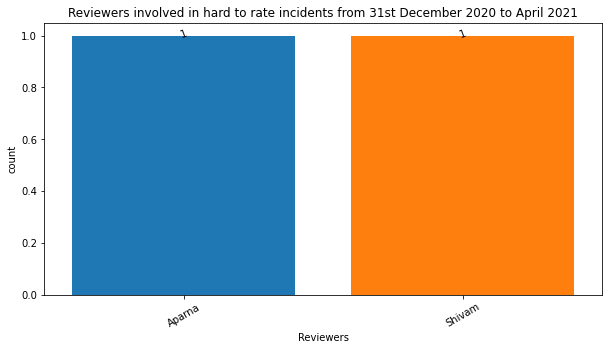

In [162]:
plt.figure(figsize=(10,5))
splot=sns.countplot(Hard_to_rate_incidents['Reviewers'],order=Hard_to_rate_incidents['Reviewers'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("Reviewers involved in hard to rate incidents from 31st December 2020 to April 2021",color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

In [163]:
Hard_to_rate_incidents['Reviewers'].count()

2

#### 6) P1 missed accident - review resubmitted

In [164]:
P1_missed_accident_review_resubmitted=data_reviewers_support[(data_reviewers_support['Rating']=='P1 missed accident - review resubmitted')]
P1_missed_accident_review_resubmitted.head()

,Date,Link to incident,link to slack,Rating,Reviewers
96,2021-02-28,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,P1 missed accident - review resubmitted,Shiva Kumar


In [165]:
P1_missed_accident_review_resubmitted['Reviewers'].value_counts()

Shiva Kumar    1
Name: Reviewers, dtype: int64

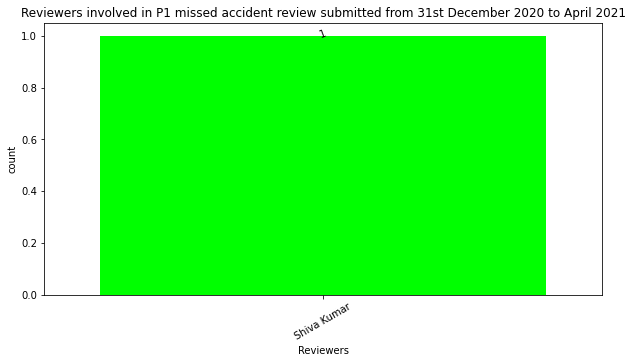

In [166]:
plt.figure(figsize=(10,5))
splot=sns.countplot(P1_missed_accident_review_resubmitted['Reviewers'],order=P1_missed_accident_review_resubmitted['Reviewers'].value_counts().index,saturation=10,color='lime')
plt.xticks(rotation=30)
plt.title("Reviewers involved in P1 missed accident review submitted from 31st December 2020 to April 2021",color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

In [167]:
P1_missed_accident_review_resubmitted['Reviewers'].count()

1

#### 7) No support

In [168]:
no_support=data_reviewers_support[(data_reviewers_support['Rating']=='No support')]
no_support

,Date,Link to incident,link to slack,Rating,Reviewers
46,2021-01-20,NaN,https://nexar.slack.com/archives/C01ESDUFXT4/p...,No support,NaN
47,2021-01-20,NaN,https://nexar.slack.com/archives/C01ESDUFXT4/p...,No support,NaN
54,2021-01-25,NaN,https://nexar.slack.com/archives/C01ESDUFXT4/p...,No support,Shiva Kumar
76,2021-02-06,https://dashboard.jp.getnexar.com/reviewer/inc...,https://nexar.slack.com/archives/C01ESDUFXT4/p...,No support,Rajeshwari
77,2021-02-08,NaN,https://nexar.slack.com/archives/C01ESDUFXT4/p...,No support,Shiva Kumar
165,2021-04-12,NaN,https://nexar.slack.com/archives/C01ESDUFXT4/p...,No support,Shivam
166,2021-04-12,NaN,https://nexar.slack.com/archives/C01ESDUFXT4/p...,No support,Shivam
167,2021-04-13,NaN,https://nexar.slack.com/archives/C01ESDUFXT4/p...,No support,Shiva Kumar


In [169]:
no_support['Reviewers'].value_counts()

Shiva Kumar    3
Shivam         2
Rajeshwari     1
Name: Reviewers, dtype: int64

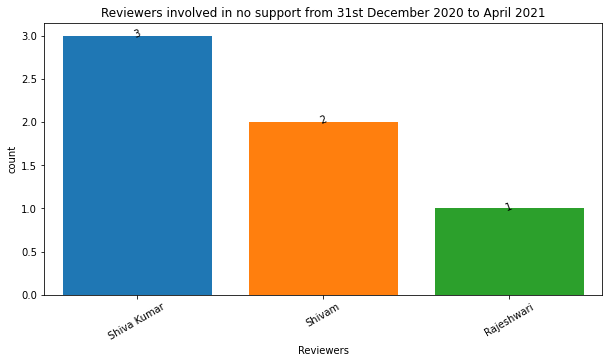

In [170]:
plt.figure(figsize=(10,5))
splot=sns.countplot(no_support['Reviewers'],order=no_support['Reviewers'].value_counts().index,saturation=10)
plt.xticks(rotation=30)
plt.title("Reviewers involved in no support from 31st December 2020 to April 2021",color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

#### 8) grabbed no submitted review

In [171]:
grabbed_no_submitted_review=data_reviewers_support[(data_reviewers_support['Rating']=='grabbed no submitted review')]
grabbed_no_submitted_review.head()

,Date,Link to incident,link to slack,Rating,Reviewers
75,2021-02-06,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01ESDUFXT4/p...,grabbed no submitted review,Narendra


In [172]:
grabbed_no_submitted_review['Reviewers'].value_counts()

Narendra    1
Name: Reviewers, dtype: int64

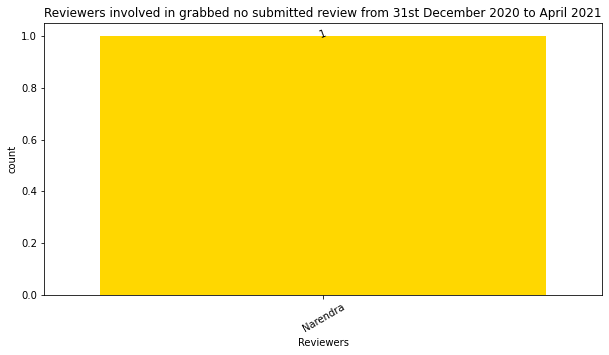

In [173]:
plt.figure(figsize=(10,5))
splot=sns.countplot(grabbed_no_submitted_review['Reviewers'],order=grabbed_no_submitted_review['Reviewers'].value_counts().index,saturation=10,color='gold')
plt.xticks(rotation=30)
plt.title("Reviewers involved in grabbed no submitted review from 31st December 2020 to April 2021",color='black')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 2),textcoords = 'offset points',rotation=20)
plt.show()

#### 9) missed accident

In [174]:
missed_accident=data_reviewers_support[(data_reviewers_support['Rating']=='missed accident')]
missed_accident

,Date,Link to incident,link to slack,Rating,Reviewers
18,2021-01-11,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,missed accident,Yuvaraja
19,2021-01-11,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,missed accident,Shiva Kumar
20,2021-01-11,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,missed accident,Rajeshwari
21,2021-01-11,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,missed accident,Mallikarjun
25,2021-01-12,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/C01DNQHQVK2/p...,missed accident,Mallikarjun
44,2021-01-17,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed accident,Shivam
45,2021-01-18,https://dashboard.jp.getnexar.com/reviewer/rev...,https://nexar.slack.com/archives/G01EY2XN6MC/p...,missed accident,Narendra


In [175]:
missed_accident['Reviewers'].value_counts()

Mallikarjun    2
Yuvaraja       1
Rajeshwari     1
Narendra       1
Shiva Kumar    1
Shivam         1
Name: Reviewers, dtype: int64

In [176]:
missed_accident['Reviewers'].count()

7

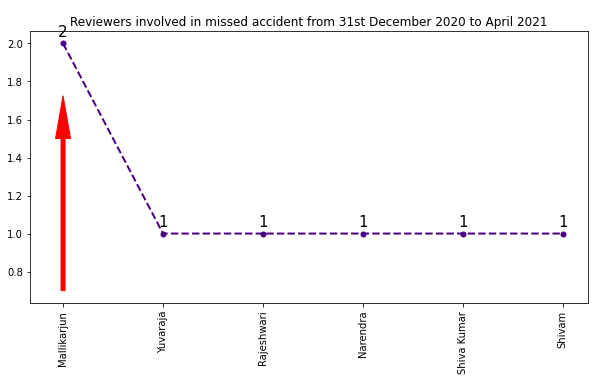

In [177]:
X=missed_accident['Reviewers'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(X,color='indigo', marker='o', linestyle='dashed',linewidth=2, markersize=5)
plt.xticks(rotation=90)
plt.arrow(0, 0.7, 0, 0.8, head_width = 0.15,width = 0.04,ec ='red',fc='red')
plt.title("Reviewers involved in missed accident from 31st December 2020 to April 2021",color='black')
for i, v in enumerate(X):
    plt.text(i, v+0.04, "\n%d" %v, ha="center",fontdict={'fontsize':'15'})
plt.show()